In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df= pd.read_csv(r'C:\Users\hp\Downloads\axisbank\axis.csv')

In [3]:
df.head()

,timestamp,open,high,low,close,volume
0,2017-01-02 09:15:00+05:30,451.40,452.00,450.60,451.20,29198.0
1,2017-01-02 09:16:00+05:30,451.15,451.15,450.50,450.80,12539.0
2,2017-01-02 09:17:00+05:30,450.50,450.80,449.30,449.30,26833.0
3,2017-01-02 09:18:00+05:30,449.30,450.10,448.95,449.75,12067.0
4,2017-01-02 09:19:00+05:30,449.75,450.30,449.25,449.80,15675.0


In [4]:
df.describe()

,open,high,low,close,volume
count,370408.000000,370408.000000,370408.000000,370408.000000,3.704080e+05
mean,578.579463,578.922061,578.222159,578.574511,3.664231e+04
std,112.796840,112.799688,112.787688,112.795615,8.097951e+04
min,288.650000,291.550000,286.700000,288.300000,0.000000e+00
25%,502.800000,503.000000,502.500000,502.800000,7.965000e+03
50%,544.700000,544.950000,544.400000,544.700000,1.670300e+04
75%,670.500000,670.900000,670.050000,670.500000,3.833925e+04
max,827.300000,827.650000,827.000000,827.200000,1.257453e+07


In [5]:
df.shape

(370546, 6)

In [6]:
df.info

<bound method DataFrame.info of                         timestamp    open    high     low   close   volume
0       2017-01-02 09:15:00+05:30  451.40  452.00  450.60  451.20  29198.0
1       2017-01-02 09:16:00+05:30  451.15  451.15  450.50  450.80  12539.0
2       2017-01-02 09:17:00+05:30  450.50  450.80  449.30  449.30  26833.0
3       2017-01-02 09:18:00+05:30  449.30  450.10  448.95  449.75  12067.0
4       2017-01-02 09:19:00+05:30  449.75  450.30  449.25  449.80  15675.0
...                           ...     ...     ...     ...     ...      ...
370541  2021-01-01 15:25:00+05:30  624.35  624.35  623.65  624.00  28490.0
370542  2021-01-01 15:26:00+05:30  624.00  624.00  623.50  623.55  13972.0
370543  2021-01-01 15:27:00+05:30  623.55  623.60  622.95  623.00  20251.0
370544  2021-01-01 15:28:00+05:30  623.20  623.25  621.55  622.55  50190.0
370545  2021-01-01 15:29:00+05:30  622.20  624.50  622.00  623.40  24345.0

[370546 rows x 6 columns]>

In [7]:
df.head()

,timestamp,open,high,low,close,volume
0,2017-01-02 09:15:00+05:30,451.40,452.00,450.60,451.20,29198.0
1,2017-01-02 09:16:00+05:30,451.15,451.15,450.50,450.80,12539.0
2,2017-01-02 09:17:00+05:30,450.50,450.80,449.30,449.30,26833.0
3,2017-01-02 09:18:00+05:30,449.30,450.10,448.95,449.75,12067.0
4,2017-01-02 09:19:00+05:30,449.75,450.30,449.25,449.80,15675.0


In [8]:
df.isnull().sum()

timestamp      0
open         138
high         138
low          138
close        138
volume       138
dtype: int64

In [10]:
new_df= pd.read_csv(r'C:\Users\hp\Downloads\axisbank\axis.csv', parse_dates=['timestamp'])

In [11]:
new_df['timestamp']= pd.to_datetime(new_df['timestamp'], errors='coerce')
print (type(new_df.timestamp[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [12]:
new_df.sort_values(by=['timestamp'], inplace=True, ascending=True)
new_df.timestamp.head()

0   2017-01-02 09:15:00+05:30
1   2017-01-02 09:16:00+05:30
2   2017-01-02 09:17:00+05:30
3   2017-01-02 09:18:00+05:30
4   2017-01-02 09:19:00+05:30
Name: timestamp, dtype: datetime64[ns, pytz.FixedOffset(330)]

### data visualisation

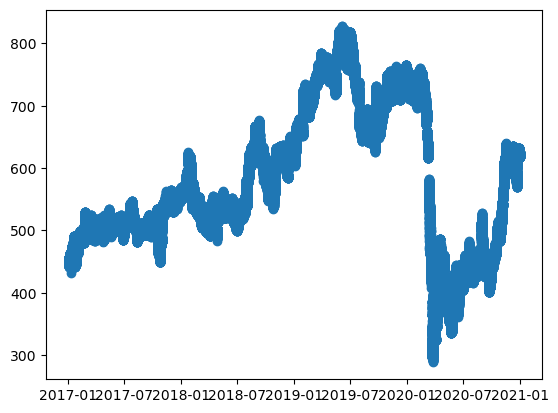

In [14]:
fig,ax=plt.subplots()
ax.scatter(new_df.timestamp, new_df.close)

In [15]:
new_df.reset_index(inplace=True)
new_df

,index,timestamp,open,high,low,close,volume
0,0,2017-01-02 09:15:00+05:30,451.40,452.00,450.60,451.20,29198.0
1,1,2017-01-02 09:16:00+05:30,451.15,451.15,450.50,450.80,12539.0
2,2,2017-01-02 09:17:00+05:30,450.50,450.80,449.30,449.30,26833.0
3,3,2017-01-02 09:18:00+05:30,449.30,450.10,448.95,449.75,12067.0
4,4,2017-01-02 09:19:00+05:30,449.75,450.30,449.25,449.80,15675.0
...,...,...,...,...,...,...,...
370541,370541,2021-01-01 15:25:00+05:30,624.35,624.35,623.65,624.00,28490.0
370542,370542,2021-01-01 15:26:00+05:30,624.00,624.00,623.50,623.55,13972.0
370543,370543,2021-01-01 15:27:00+05:30,623.55,623.60,622.95,623.00,20251.0
370544,370544,2021-01-01 15:28:00+05:30,623.20,623.25,621.55,622.55,50190.0


In [17]:
close_df=new_df['close']
close_df

0         451.20
1         450.80
2         449.30
3         449.75
4         449.80
           ...  
370541    624.00
370542    623.55
370543    623.00
370544    622.55
370545    623.40
Name: close, Length: 370546, dtype: float64

In [18]:
close_df.shape

(370546,)

In [19]:
close_df.size

370546

In [20]:
scaler=MinMaxScaler(feature_range=(0,1))
close_df=scaler.fit_transform(np.array(close_df).reshape(-1,1))
close_df

array([[0.30228243],
       [0.30154017],
       [0.29875673],
       ...,
       [0.62107998],
       [0.62024494],
       [0.62182223]])

### train and test split

In [21]:
training_size=int(len(close_df)*0.7)
test_size=len(close_df)-training_size
train_data, test_data=close_df[0:training_size,:], close_df[training_size:len(close_df),:1]

In [22]:
train_data.shape, close_df.shape

((259382, 1), (370546, 1))

In [23]:
test_data.shape

(111164, 1)

In [24]:
type(test_data)

numpy.ndarray

In [25]:
import numpy as np
def create_dataset(dataset, time_step=1):
    dataX=[]
    dataY=[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
        return np.array(dataX), np.array(dataY)

In [27]:
time_step=100
X_train, y_train= create_dataset(train_data, time_step)
X_test, y_test= create_dataset(test_data, time_step)


In [28]:
X_test, y_test= create_dataset(test_data, time_step)

In [29]:
y_train.shape

(1,)

In [30]:
X_train.shape

(1, 100)

In [31]:
print(X_test.shape), print(y_test.shape)

(1, 100)
(1,)


(None, None)

In [32]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
M= Sequential()
M.add(LSTM(50, return_sequences=True,input_shape=(time_step,1)))
M.add(LSTM(50,return_sequences=True))
M.add(LSTM(50))
M.add(Dense(1))
M.compile(loss='mean_squared_error', optimizer='adam')

In [36]:
M = Sequential()
M.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
M.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
M.add(LSTM(50))
M.add(Dense(1))
M.compile(loss='mean_squared_error', optimizer='adam', metrics='acc')

In [37]:
M.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
M.fit(X_train, y_train, validation_data = (X_test, y_test), epochs =100, batch_size = 64, verbose = 1);

Epoch 1/100
1/1 [==============================] - 16s 16s/step - loss: 0.0772 - acc: 0.0000e+00 - val_loss: 0.4394 - val_acc: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 289ms/step - loss: 0.0521 - acc: 0.0000e+00 - val_loss: 0.3071 - val_acc: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 190ms/step - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.1773 - val_acc: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 175ms/step - loss: 0.0112 - acc: 0.0000e+00 - val_loss: 0.0624 - val_acc: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 171ms/step - loss: 3.8421e-04 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 235ms/step - loss: 0.0068 - acc: 0.0000e+00 - val_loss: 2.0304e-04 - val_acc: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 205ms/step - loss: 0.0141 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 8/100
1/1 [===

1/1 [==============================] - 0s 242ms/step - loss: 1.7887e-07 - acc: 0.0000e+00 - val_loss: 0.0835 - val_acc: 0.0000e+00
Epoch 59/100
1/1 [==============================] - 0s 248ms/step - loss: 3.2146e-06 - acc: 0.0000e+00 - val_loss: 0.0818 - val_acc: 0.0000e+00
Epoch 60/100
1/1 [==============================] - 0s 257ms/step - loss: 1.2977e-05 - acc: 0.0000e+00 - val_loss: 0.0807 - val_acc: 0.0000e+00
Epoch 61/100
1/1 [==============================] - 0s 239ms/step - loss: 2.3175e-05 - acc: 0.0000e+00 - val_loss: 0.0802 - val_acc: 0.0000e+00
Epoch 62/100
1/1 [==============================] - 0s 260ms/step - loss: 2.8338e-05 - acc: 0.0000e+00 - val_loss: 0.0805 - val_acc: 0.0000e+00
Epoch 63/100
1/1 [==============================] - 0s 283ms/step - loss: 2.6252e-05 - acc: 0.0000e+00 - val_loss: 0.0813 - val_acc: 0.0000e+00
Epoch 64/100
1/1 [==============================] - 0s 266ms/step - loss: 1.8516e-05 - acc: 0.0000e+00 - val_loss: 0.0826 - val_acc: 0.0000e+00
Epoch

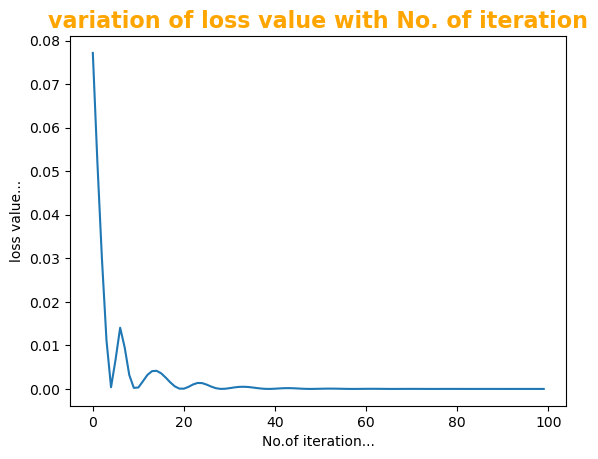

In [39]:
loss=M.history.history['loss']
plt.plot(loss)
plt.xlabel("No.of iteration...")
plt.ylabel("loss value...")
plt.title("variation of loss value with No. of iteration",color="orange",fontsize=16,fontweight="bold");

In [40]:
train_predict1=M.predict(X_train)

1/1 [==============================] - 3s 3s/step


In [41]:
test_predict1=M.predict(X_test)

1/1 [==============================] - 0s 61ms/step


In [42]:
train_predict1=scaler.inverse_transform(train_predict1)
test_predict1=scaler.inverse_transform(test_predict1)

In [43]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict1))


442.5606815566776

In [44]:
math.sqrt(mean_squared_error(y_test,test_predict1))

551.3738130026877

In [45]:
close_df

array([[0.30228243],
       [0.30154017],
       [0.29875673],
       ...,
       [0.62107998],
       [0.62024494],
       [0.62182223]])

In [46]:
train_predict1.shape

(1, 1)

In [47]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(close_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict1)+look_back, :] = train_predict1

# shift test predictions for plotting
testPredictPlot = np.empty_like(close_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict1)+(look_back*2)+1:len(df)-1, :] = test_predict1

Text(0, 0.5, 'closing price')

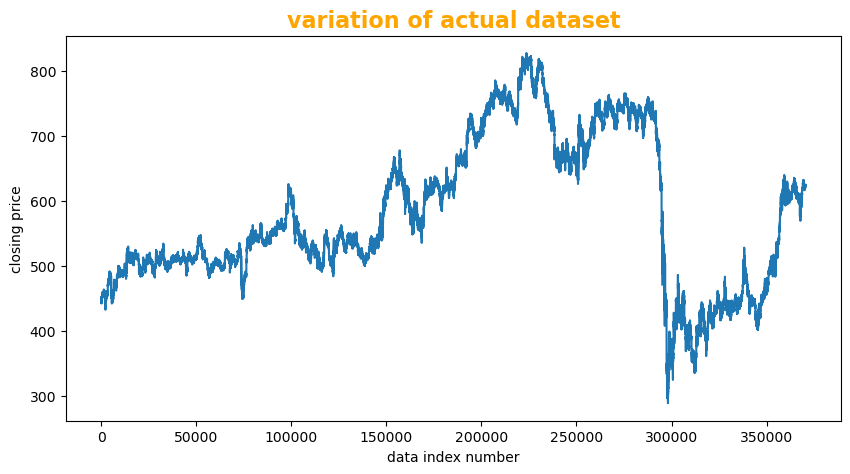

In [48]:
# plot baseline and predictions
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(close_df))
plt.title("variation of actual dataset",color="orange",fontsize=16,fontweight="bold")
plt.xlabel("data index number")
plt.ylabel("closing price")

Text(0, 0.5, 'closing price')

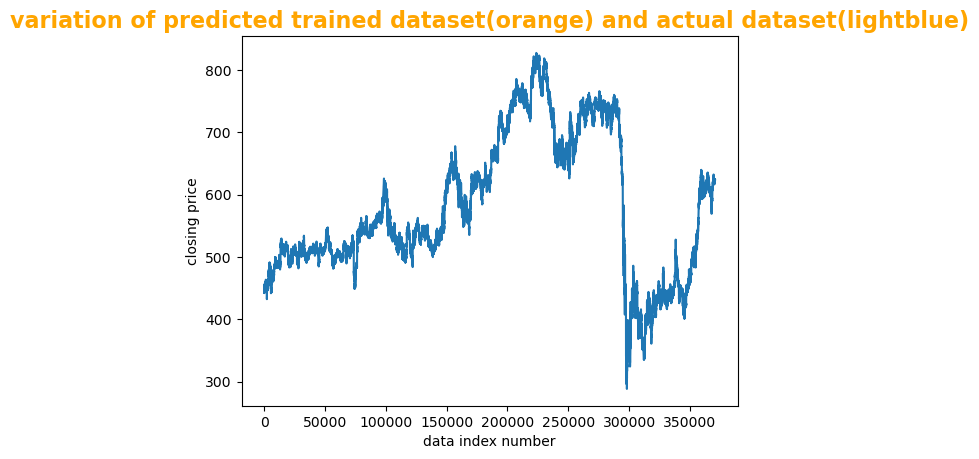

In [49]:
#plot of predictions on closing price made by our model on training dataset vs actual closing price
plt.plot(scaler.inverse_transform(close_df))
plt.plot(trainPredictPlot)
plt.title("variation of predicted trained dataset(orange) and actual dataset(lightblue)",color="orange",fontsize=16,fontweight="bold")
plt.xlabel("data index number")
plt.ylabel("closing price")

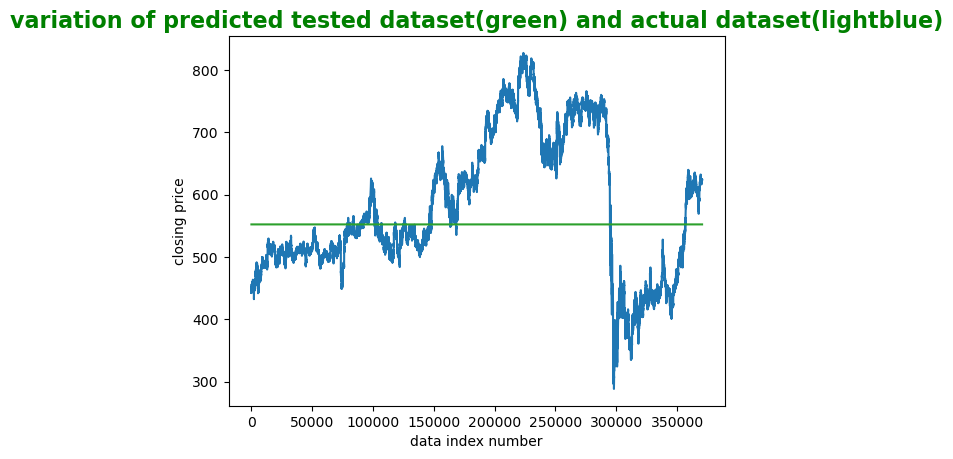

In [50]:
#plot of prediction on closing price made by our model on training dataset vs actual closing price
#vs prediction on closing price made by our model on test dataset
plt.plot(scaler.inverse_transform(close_df))
plt.plot(trainPredictPlot)
plt.title("variation of predicted tested dataset(green) and actual dataset(lightblue)",color="green",fontsize=16,fontweight="bold")
plt.xlabel("data index number")
plt.ylabel("closing price")
plt.plot(testPredictPlot)
plt.show()

since our model trained with first 100 data inputs and start predicting from 101 onwards so orange starts from 101 dataindex no. , similar logic for test data
light blue=-actual closing price

orange=prediction on closing price made by our model on training dataset

green=prediction on closing price made by model on test dataset